#  Step 1: Data Preprocessing

In [1]:
#dependencies
import pandas as pd

In [5]:
#read in csv and make copy for editing
original_df = pd.read_csv('Resources/fake_job_postings.csv')
wip_df = original_df.copy()
wip_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
#checking for value counts

nun_under_ten_col = []


for i in wip_df:
    if int(wip_df[i].nunique()) < 30:
        print('-' * 10 + f'{ i }' + '-' * 20)
        nun_under_ten_col.append(i)
        print(wip_df[i].value_counts())

print(nun_under_ten_col)


----------telecommuting--------------------
telecommuting
0    17113
1      767
Name: count, dtype: int64
----------has_company_logo--------------------
has_company_logo
1    14220
0     3660
Name: count, dtype: int64
----------has_questions--------------------
has_questions
0    9088
1    8792
Name: count, dtype: int64
----------employment_type--------------------
employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64
----------required_experience--------------------
required_experience
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64
----------required_education--------------------
required_education
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree               

In [7]:
#sorting by relevent columns

cat_df = wip_df[['job_id', 'location', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent' ]]
print(len(cat_df))
cat_df_len = len(cat_df)
cat_df.head()





17880


,job_id,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,1,"US, NY, New York",0,1,0,Other,Internship,NaN,0
1,2,"NZ, , Auckland",0,1,0,Full-time,Not Applicable,NaN,0
2,3,"US, IA, Wever",0,1,0,NaN,NaN,NaN,0
3,4,"US, DC, Washington",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,5,"US, FL, Fort Worth",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0


In [8]:
#seperating location file to split later on 

loc = wip_df['location']
print(loc)

0            US, NY, New York
1              NZ, , Auckland
2               US, IA, Wever
3          US, DC, Washington
4          US, FL, Fort Worth
                 ...         
17875         CA, ON, Toronto
17876    US, PA, Philadelphia
17877         US, TX, Houston
17878           NG, LA, Lagos
17879       NZ, N, Wellington
Name: location, Length: 17880, dtype: object


In [9]:
#splitting
loc_df = loc.str.split(',', expand=True)
print(loc_df)

       0    1              2     3     4     5     6     7     8     9     10  \
0      US   NY       New York  None  None  None  None  None  None  None  None   
1      NZ            Auckland  None  None  None  None  None  None  None  None   
2      US   IA          Wever  None  None  None  None  None  None  None  None   
3      US   DC     Washington  None  None  None  None  None  None  None  None   
4      US   FL     Fort Worth  None  None  None  None  None  None  None  None   
...    ..  ...            ...   ...   ...   ...   ...   ...   ...   ...   ...   
17875  CA   ON        Toronto  None  None  None  None  None  None  None  None   
17876  US   PA   Philadelphia  None  None  None  None  None  None  None  None   
17877  US   TX        Houston  None  None  None  None  None  None  None  None   
17878  NG   LA          Lagos  None  None  None  None  None  None  None  None   
17879  NZ    N     Wellington  None  None  None  None  None  None  None  None   

         11    12    13    

In [10]:
loc_df = pd.DataFrame(loc_df)
loc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,US,NY,New York,None,None,None,None,None,None,None,None,None,None,None,None,None
1,NZ,,Auckland,None,None,None,None,None,None,None,None,None,None,None,None,None
2,US,IA,Wever,None,None,None,None,None,None,None,None,None,None,None,None,None
3,US,DC,Washington,None,None,None,None,None,None,None,None,None,None,None,None,None
4,US,FL,Fort Worth,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,CA,ON,Toronto,None,None,None,None,None,None,None,None,None,None,None,None,None
17876,US,PA,Philadelphia,None,None,None,None,None,None,None,None,None,None,None,None,None
17877,US,TX,Houston,None,None,None,None,None,None,None,None,None,None,None,None,None
17878,NG,LA,Lagos,None,None,None,None,None,None,None,None,None,None,None,None,None


In [11]:
add_loc = loc_df.iloc[:, [0,1,2]]
print(add_loc)

        0    1              2
0      US   NY       New York
1      NZ            Auckland
2      US   IA          Wever
3      US   DC     Washington
4      US   FL     Fort Worth
...    ..  ...            ...
17875  CA   ON        Toronto
17876  US   PA   Philadelphia
17877  US   TX        Houston
17878  NG   LA          Lagos
17879  NZ    N     Wellington

[17880 rows x 3 columns]


In [12]:
#reattaching location after split
cat_df = pd.concat([cat_df,add_loc], axis=1)
cat_df.rename(columns={0: 'country', 1: 'region', 2: 'city'}, inplace=True)
cat_df.head()

,job_id,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,country,region,city
0,1,"US, NY, New York",0,1,0,Other,Internship,NaN,0,US,NY,New York
1,2,"NZ, , Auckland",0,1,0,Full-time,Not Applicable,NaN,0,NZ,,Auckland
2,3,"US, IA, Wever",0,1,0,NaN,NaN,NaN,0,US,IA,Wever
3,4,"US, DC, Washington",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,US,DC,Washington
4,5,"US, FL, Fort Worth",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,US,FL,Fort Worth


In [13]:
country_count = cat_df['country'].value_counts()
print(country_count)

country
US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SI        1
PE        1
SD        1
UG        1
KH        1
Name: count, Length: 90, dtype: int64


In [14]:
print(country_count[0:15])

country
US    10656
GB     2384
GR      940
CA      457
DE      383
NZ      333
IN      276
AU      214
PH      132
NL      127
BE      117
IE      114
SG       80
HK       77
PL       76
Name: count, dtype: int64


In [15]:
column_names = cat_df.columns.to_list()
print(column_names)

['job_id', 'location', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent', 'country', 'region', 'city']


In [16]:

cat_df = cat_df.drop(columns='location')
cat_df = cat_df[['job_id', 'country', 'region', 'city', 'telecommuting', 
                'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 
                'required_education', 'fraudulent']]
cat_df.head()

,job_id,country,region,city,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,1,US,NY,New York,0,1,0,Other,Internship,NaN,0
1,2,NZ,,Auckland,0,1,0,Full-time,Not Applicable,NaN,0
2,3,US,IA,Wever,0,1,0,NaN,NaN,NaN,0
3,4,US,DC,Washington,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,5,US,FL,Fort Worth,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0


In [17]:
cat_df.to_csv('Resources/testing.csv')

In [18]:
#function for setting cutoff for data simplicity. Arguments: target (df and column to be altered), num (cutoff number)

def cut_off(target, num):
    target_val = target.value_counts()
    replace = target_val[target_val < num].index.tolist()
    target = [target.replace(i, 'Other') for i in target]
    print(target.value_counts())


#function for scaling. 
def scaler(target, features):
    y = target
    X = features
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)



#  Step 2: Machine Learning Model Training & Optimization

#  Step 3: Data Visualization & Analysis

In [19]:
#checking for value counts

nun_under_ten_col = []


for i in wip_df:
    if int(wip_df[i].nunique()) < 30:
        print('-' * 10 + f'{ i }' + '-' * 20)
        nun_under_ten_col.append(i)
        print(wip_df[i].value_counts())

print(nun_under_ten_col)


----------telecommuting--------------------
telecommuting
0    17113
1      767
Name: count, dtype: int64
----------has_company_logo--------------------
has_company_logo
1    14220
0     3660
Name: count, dtype: int64
----------has_questions--------------------
has_questions
0    9088
1    8792
Name: count, dtype: int64
----------employment_type--------------------
employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64
----------required_experience--------------------
required_experience
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64
----------required_education--------------------
required_education
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree               

In [20]:
#sorting by relevent columns

cat_df = wip_df[['job_id', 'location', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent' ]]
print(len(cat_df))
cat_df_len = len(cat_df)
cat_df.head()





17880


,job_id,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,1,"US, NY, New York",0,1,0,Other,Internship,NaN,0
1,2,"NZ, , Auckland",0,1,0,Full-time,Not Applicable,NaN,0
2,3,"US, IA, Wever",0,1,0,NaN,NaN,NaN,0
3,4,"US, DC, Washington",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,5,"US, FL, Fort Worth",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0


In [21]:
#seperating location file to split later on 

loc = wip_df['location']
print(loc)

0            US, NY, New York
1              NZ, , Auckland
2               US, IA, Wever
3          US, DC, Washington
4          US, FL, Fort Worth
                 ...         
17875         CA, ON, Toronto
17876    US, PA, Philadelphia
17877         US, TX, Houston
17878           NG, LA, Lagos
17879       NZ, N, Wellington
Name: location, Length: 17880, dtype: object


In [22]:
#splitting
loc_df = loc.str.split(',', expand=True)
print(loc_df)

       0    1              2     3     4     5     6     7     8     9     10  \
0      US   NY       New York  None  None  None  None  None  None  None  None   
1      NZ            Auckland  None  None  None  None  None  None  None  None   
2      US   IA          Wever  None  None  None  None  None  None  None  None   
3      US   DC     Washington  None  None  None  None  None  None  None  None   
4      US   FL     Fort Worth  None  None  None  None  None  None  None  None   
...    ..  ...            ...   ...   ...   ...   ...   ...   ...   ...   ...   
17875  CA   ON        Toronto  None  None  None  None  None  None  None  None   
17876  US   PA   Philadelphia  None  None  None  None  None  None  None  None   
17877  US   TX        Houston  None  None  None  None  None  None  None  None   
17878  NG   LA          Lagos  None  None  None  None  None  None  None  None   
17879  NZ    N     Wellington  None  None  None  None  None  None  None  None   

         11    12    13    

In [23]:
loc_df = pd.DataFrame(loc_df)
loc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,US,NY,New York,None,None,None,None,None,None,None,None,None,None,None,None,None
1,NZ,,Auckland,None,None,None,None,None,None,None,None,None,None,None,None,None
2,US,IA,Wever,None,None,None,None,None,None,None,None,None,None,None,None,None
3,US,DC,Washington,None,None,None,None,None,None,None,None,None,None,None,None,None
4,US,FL,Fort Worth,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,CA,ON,Toronto,None,None,None,None,None,None,None,None,None,None,None,None,None
17876,US,PA,Philadelphia,None,None,None,None,None,None,None,None,None,None,None,None,None
17877,US,TX,Houston,None,None,None,None,None,None,None,None,None,None,None,None,None
17878,NG,LA,Lagos,None,None,None,None,None,None,None,None,None,None,None,None,None


In [24]:
add_loc = loc_df.iloc[:, [0,1,2]]
print(add_loc)

        0    1              2
0      US   NY       New York
1      NZ            Auckland
2      US   IA          Wever
3      US   DC     Washington
4      US   FL     Fort Worth
...    ..  ...            ...
17875  CA   ON        Toronto
17876  US   PA   Philadelphia
17877  US   TX        Houston
17878  NG   LA          Lagos
17879  NZ    N     Wellington

[17880 rows x 3 columns]


In [25]:
#reattaching location after split
cat_df = pd.concat([cat_df,add_loc], axis=1)
cat_df.rename(columns={0: 'country', 1: 'region', 2: 'city'}, inplace=True)
cat_df.head()

,job_id,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,country,region,city
0,1,"US, NY, New York",0,1,0,Other,Internship,NaN,0,US,NY,New York
1,2,"NZ, , Auckland",0,1,0,Full-time,Not Applicable,NaN,0,NZ,,Auckland
2,3,"US, IA, Wever",0,1,0,NaN,NaN,NaN,0,US,IA,Wever
3,4,"US, DC, Washington",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,US,DC,Washington
4,5,"US, FL, Fort Worth",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,US,FL,Fort Worth


In [26]:
country_count = cat_df['country'].value_counts()
print(country_count)

country
US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SI        1
PE        1
SD        1
UG        1
KH        1
Name: count, Length: 90, dtype: int64


In [27]:
print(country_count[0:15])

country
US    10656
GB     2384
GR      940
CA      457
DE      383
NZ      333
IN      276
AU      214
PH      132
NL      127
BE      117
IE      114
SG       80
HK       77
PL       76
Name: count, dtype: int64


In [28]:
column_names = cat_df.columns.to_list()
print(column_names)

['job_id', 'location', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent', 'country', 'region', 'city']


In [29]:

cat_df = cat_df.drop(columns='location')
cat_df = cat_df[['job_id', 'country', 'region', 'city', 'telecommuting', 
                'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 
                'required_education', 'fraudulent']]
cat_df.head()

,job_id,country,region,city,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,1,US,NY,New York,0,1,0,Other,Internship,NaN,0
1,2,NZ,,Auckland,0,1,0,Full-time,Not Applicable,NaN,0
2,3,US,IA,Wever,0,1,0,NaN,NaN,NaN,0
3,4,US,DC,Washington,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,5,US,FL,Fort Worth,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0


In [30]:
cat_df.to_csv('Resources/testing.csv')

In [31]:
#function for setting cutoff for data simplicity. Arguments: target (df and column to be altered), num (cutoff number)

def cut_off(target, num):
    target_val = target.value_counts()
    replace = target_val[target_val < num].index.tolist()
    target = [target.replace(i, 'Other') for i in target]
    print(target.value_counts())


#function for scaling. 
def scaler(target, features):
    y = target
    X = features
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)



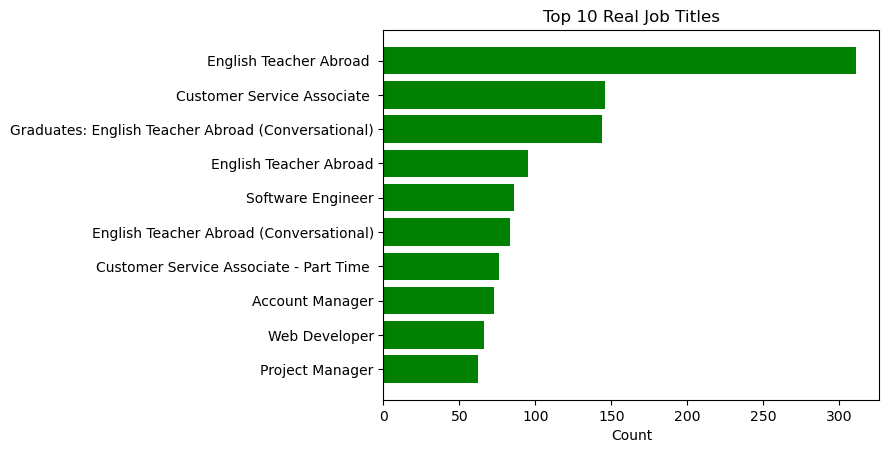

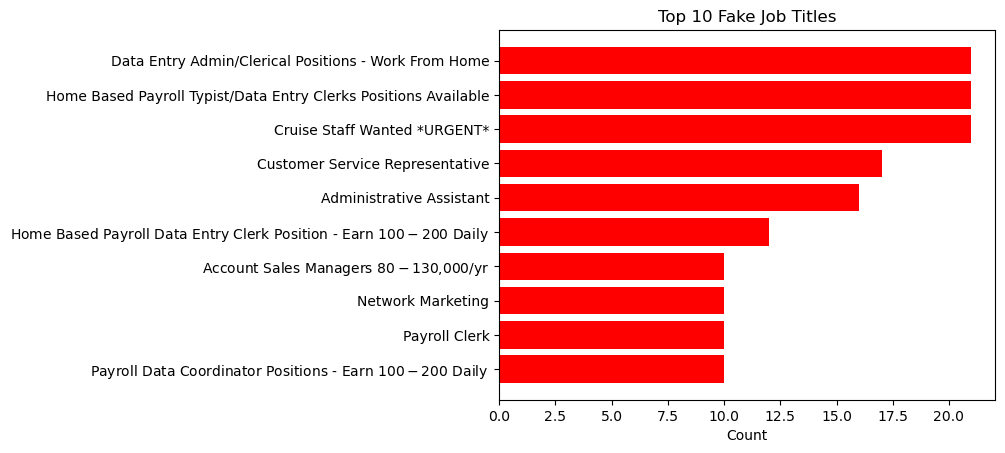

In [37]:
real_titles = wip_df[wip_df['fraudulent'] == 0]['title'].value_counts().head(10)
fake_titles = wip_df[wip_df['fraudulent'] == 1]['title'].value_counts().head(10)

# plot real
plt.barh(real_titles.index[::-1], real_titles.values[::-1], color='green')
plt.title('Top 10 Real Job Titles')
plt.xlabel('Count')
plt.show()

# plot fake
plt.barh(fake_titles.index[::-1], fake_titles.values[::-1], color='red')
plt.title('Top 10 Fake Job Titles')
plt.xlabel('Count')
plt.show()


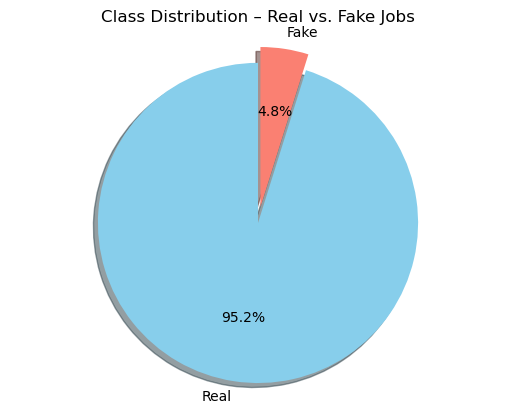

In [40]:
counts = cat_df['fraudulent'].value_counts().sort_index()
labels = ['Real', 'Fake']
colors = ['skyblue', 'salmon']
explode = (0, 0.1)  # slightly separate the fake slice

plt.pie(counts, labels=labels, colors=colors, explode=explode, 
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Class Distribution – Real vs. Fake Jobs')
plt.axis('equal')  # circle shape
plt.show()
